In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [28]:
confustion_matrix_filename = "/result_outputs/confusion_matrix.npy"
permutation = np.array([9, 2, 3, 4, 7, 5, 0, 6, 8, 1])
names = ["linear_unbalanced_1", 
         "linear_unbalanced_2", 
         "balanced", 
         "balanced_5000", 
         "balanced_1600", 
         "balanced_800", 
         "balanced_400", 
         "balanced_200",
         "balanced_100", 
         "balanced_50", 
         "balanced_25", 
         "balanced_10", 
         "balanced_5", 
         "expo_unbalance", 
         "expo_unbalance_2560to5", 
         "expo_unbalance_5000to1",
         "cut_unbalance_4890or25", 
         "linear_unbalance_1020to3"]
shapes = [list(range(5000,0,-500)), 
          list(range(4100, 1100, -300)), 
          [2750]*10,
          [5000]*10,
          [1600]*10,
          [800]*10,
          [400]*10,
          [200]*10,
          [100]*10,
          [50]*10,
          [25]*10,
          [10]*10,
          [5]*10,
          [5000, 4287, 3673, 3148, 2699, 2312, 1982, 1699, 1454, 1246],
          [2560, 1280, 640, 320, 160, 80, 40, 20, 10, 5],
          [5000, 2000, 800, 320, 128, 51, 20, 8, 3, 1],
          [4890, 25, 25, 25, 25, 25, 25, 25, 25, 25],
          [1020, 907, 794, 681, 568, 455, 342, 229, 116, 3]]
rescaled_shapes = [2560]

In [7]:
def get_table_from_confusion_martix(confusion_martix):
    result = {"FP":[-1]*10, "FN":[-1]*10}
    for c in range(0,10):
        TP = confusion_martix[c][c]
        result["FP"][c] = np.sum(confusion_martix[:,c]) - TP
        result["FN"][c] = np.sum(confusion_martix[c,:]) - TP
    return result

In [4]:
experment_name = "CIFAR10_Custom10_balan5000"
m =np.load(experment_name + confustion_matrix_filename)
m

array([[862.,  10.,  29.,  18.,   9.,   3.,   4.,   9.,  30.,  26.],
       [  9., 926.,   1.,   3.,   0.,   1.,   4.,   1.,  11.,  44.],
       [ 43.,   2., 789.,  43.,  36.,  27.,  31.,  20.,   5.,   4.],
       [ 28.,   4.,  39., 677.,  37., 128.,  41.,  25.,  12.,   9.],
       [ 17.,   3.,  51.,  48., 799.,  30.,  24.,  20.,   6.,   2.],
       [  8.,   5.,  31., 142.,  28., 735.,  15.,  24.,   6.,   6.],
       [  8.,   5.,  28.,  41.,  16.,  14., 873.,   4.,   6.,   5.],
       [ 10.,   1.,  20.,  30.,  30.,  31.,   2., 864.,   5.,   7.],
       [ 39.,  20.,   5.,   8.,   2.,   4.,   1.,   3., 901.,  17.],
       [ 14.,  53.,   9.,   5.,   0.,   4.,   3.,   5.,  17., 890.]])

In [8]:
get_table_from_confusion_martix(m)

{'FP': [176.0, 103.0, 213.0, 338.0, 158.0, 242.0, 125.0, 111.0, 98.0, 120.0],
 'FN': [138.0, 74.0, 211.0, 323.0, 201.0, 265.0, 127.0, 136.0, 99.0, 110.0]}

In [59]:
experment_names = ["MNIST_Custom05_balan400", "MNIST_cut_unbalance_4890or25", "MNIST_linear_unbalance_1020to3", "MNIST_expo_unbalance_2560to5", "MNIST_expo_unbalance_5000to1"]
FPs = []
FNs = []
for e in experment_names:
    print(e)
    rates = get_table_from_confusion_martix(np.load(e + confustion_matrix_filename))
    print('FP: '+str(rates['FP']))
    FPs.append(rates['FP'])
    print('FN: '+str(rates['FN']))
    FNs.append(rates['FN'])
    print()
    


MNIST_Custom05_balan400
FP: [16.0, 9.0, 16.0, 16.0, 8.0, 19.0, 13.0, 29.0, 12.0, 15.0]
FN: [6.0, 11.0, 12.0, 14.0, 15.0, 10.0, 16.0, 16.0, 18.0, 35.0]

MNIST_cut_unbalance_4890or25
FP: [28.0, 29.0, 48.0, 43.0, 12.0, 75.0, 517.0, 70.0, 72.0, 97.0]
FN: [94.0, 52.0, 105.0, 95.0, 179.0, 137.0, 1.0, 87.0, 131.0, 110.0]

MNIST_linear_unbalance_1020to3
FP: [0.0, 21.0, 65.0, 13.0, 13.0, 30.0, 541.0, 32.0, 16.0, 78.0]
FN: [654.0, 5.0, 12.0, 12.0, 44.0, 9.0, 4.0, 20.0, 37.0, 12.0]

MNIST_expo_unbalance_2560to5
FP: [1.0, 45.0, 102.0, 42.0, 7.0, 23.0, 419.0, 10.0, 0.0, 580.0]
FN: [385.0, 5.0, 13.0, 23.0, 196.0, 49.0, 4.0, 151.0, 399.0, 4.0]

MNIST_expo_unbalance_5000to1
FP: [0.0, 64.0, 412.0, 77.0, 2.0, 22.0, 760.0, 11.0, 0.0, 1230.0]
FN: [945.0, 2.0, 10.0, 23.0, 420.0, 92.0, 2.0, 173.0, 909.0, 2.0]



In [42]:
distribution[permutation]

array([   1,  800,  320,  128,    8,   51, 5000,   20,    3, 2000])

In [70]:
def plot_table(title, rows, columns, cells):
    fig, ax = plt.subplots()
    ax.axis('off')
    ax.axis('tight')
    the_table = ax.table(cellText=cells,
                      rowLabels=rows,
                      colLabels=columns,
                      loc='center')
    fig.tight_layout()
    ax.set_title(title)
    plt.show()
    

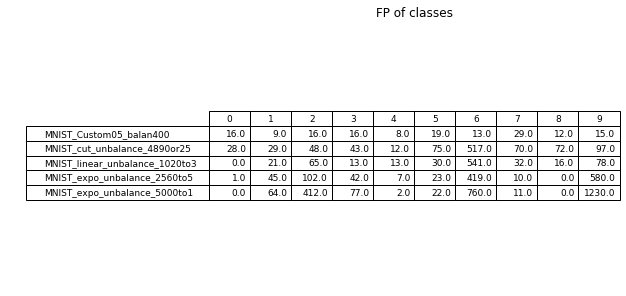

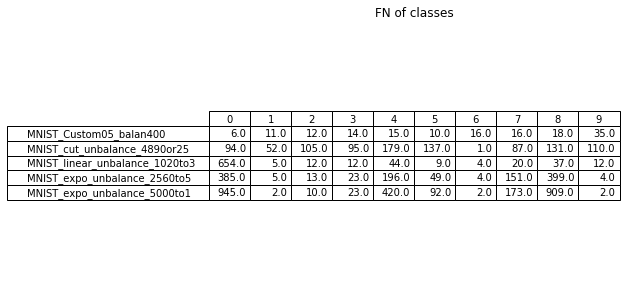

In [71]:
plot_table('FP of classes', experment_names, [str(x) for x in range(0,10)], FPs)
plot_table('FN of classes', experment_names, [str(x) for x in range(0,10)], FNs)

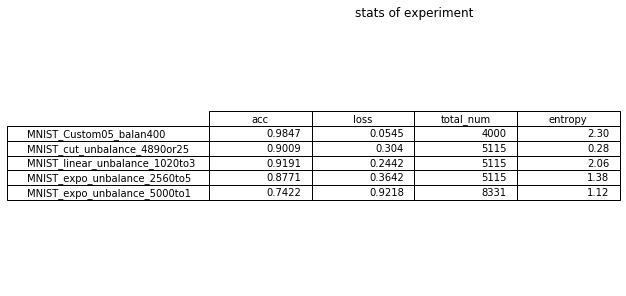

In [75]:
distributions = [
    [400]*10,
    [4890, 25, 25, 25, 25, 25, 25, 25, 25, 25],
    [1020, 907, 794, 681, 568, 455, 342, 229, 116, 3],
    [2560, 1280, 640, 320, 160, 80, 40, 20, 10, 5],
    [5000, 2000, 800, 320, 128, 51, 20, 8, 3, 1]
]
acc = [0.9847, 0.9009, 0.9191, 0.8771, 0.7422]
loss = [0.0545, 0.3040, 0.2442, 0.3642, 0.9218]
total_num = []
entropy = []
for l in distributions:
    total_num.append(np.sum(l))
    entropy.append("{:.2f}".format(stats.entropy(l)))
    
columns =  ['acc', 'loss','total_num', 'entropy']
rows = experment_names
data = []
for i in range(0,5):
    temp = []
    temp.append(acc[i])
    temp.append(loss[i])
    temp.append(total_num[i])
    temp.append(entropy[i])
    data.append(temp)
plot_table('stats of experiment', rows, columns, data)    

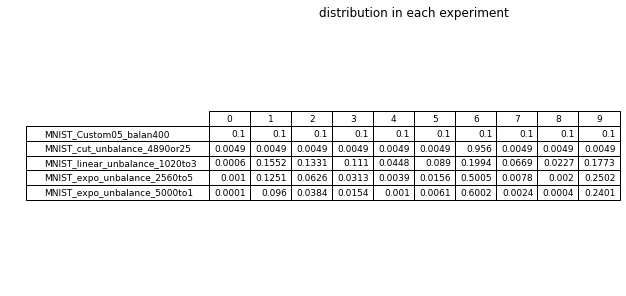

In [102]:
distribution[permutation]
rows = experment_names
columns = [str(x) for x in range(0,10)]
d = np.array(distributions)[:,permutation]
d = np.around(d / np.reshape(np.sum(d,1), (5,1)), 4)
plot_table('distribution in each experiment', rows, columns, d)
    

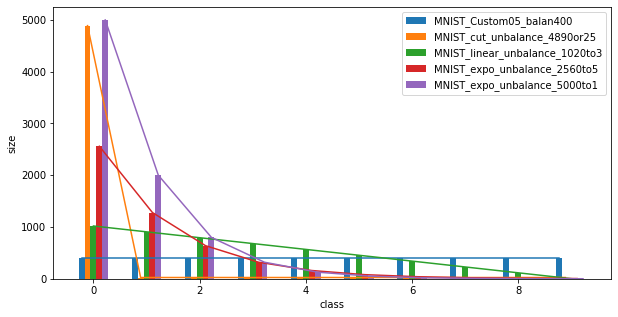

In [119]:
width = 2 / len(shapes)
x = np.arange(10) - len(shapes) * width / 9
i = 0

fig, ax = plt.subplots(figsize=(10, 5))
for shape in distributions:
    ax.bar(x + i*width, shape, width, label=experment_names[i])
    ax.plot(x + i*width, shape)
    i = i + 1
plt.xlabel('class')
plt.ylabel('size')
ax.legend()

In [69]:
len(rows)

4

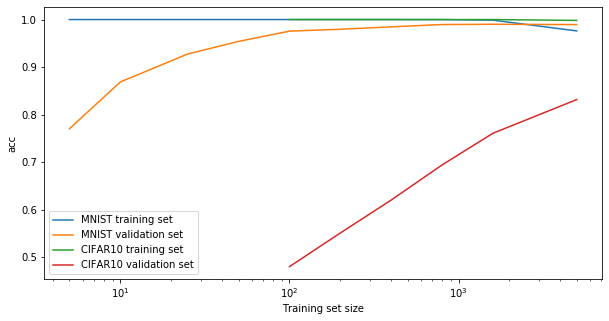

In [117]:
sizes = np.array([5000, 1600, 800, 400, 200, 100, 50, 25, 10, 5])
sizes_2 = np.array([5000, 1600, 800, 400, 200, 100])
acc_val = [0.9894, 0.9901, 0.9895, 0.9847, 0.9796, 0.9756, 0.954, 0.9275, 0.8687, 0.7703]
acc_train = [0.9761, 0.9987, 0.9999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
acc_val_2 = [0.8316, 0.7609, 0.6942, 0.6203, 0.5509, 0.4801]
acc_train_2 = [0.9982, 1.0, 1.0, 1.0, 1.0, 1.0]
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(sizes, acc_train, label = "MNIST training set")
ax.plot(sizes, acc_val, label = "MNIST validation set")
ax.plot(sizes_2, acc_train_2, label = "CIFAR10 training set")
ax.plot(sizes_2, acc_val_2, label = "CIFAR10 validation set")
plt.xscale('log')
plt.xlabel('Training set size')
plt.ylabel('acc')
ax.legend()

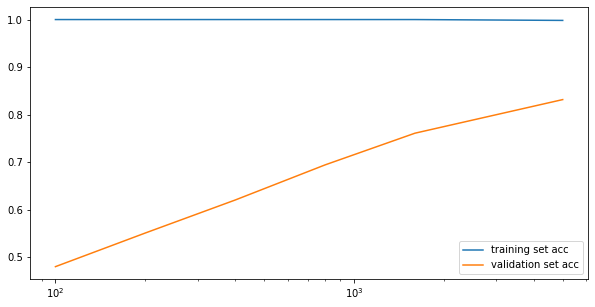

In [108]:


fig, ax = plt.subplots(figsize=(10, 5))

plt.xscale('log')
ax.legend()